## Notebook Setup

In [1]:
import os
import json

import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

import umap
from sklearn.manifold import TSNE

In [2]:
df_train_raw = pl.read_csv('data/raw/train.csv')

## Exploratory Data Analysis (EDA)

In [3]:
df_train_raw.sample(n = 8)

id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
i64,f64,str,f64,f64,str,f64,f64,str
10965,0.0,"""No""",8.0,4.0,"""No""",5.0,8.0,"""Extrovert"""
5493,0.0,"""No""",5.0,3.0,"""No""",4.0,5.0,"""Introvert"""
2743,2.0,"""No""",7.0,3.0,null,7.0,9.0,"""Extrovert"""
12072,2.0,"""No""",4.0,3.0,"""No""",6.0,9.0,"""Extrovert"""
4806,4.0,"""No""",6.0,7.0,"""No""",8.0,6.0,"""Extrovert"""
11502,2.0,"""No""",3.0,4.0,"""No""",6.0,null,"""Extrovert"""
3063,2.0,"""No""",7.0,4.0,"""No""",10.0,3.0,"""Extrovert"""
11320,2.0,"""No""",5.0,4.0,"""No""",13.0,9.0,"""Extrovert"""


In [4]:
df_train_raw.describe()

statistic,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
str,f64,f64,str,f64,f64,str,f64,f64,str
"""count""",18524.0,17334.0,"""16631""",17344.0,17058.0,"""17375""",17470.0,17260.0,"""18524"""
"""null_count""",0.0,1190.0,"""1893""",1180.0,1466.0,"""1149""",1054.0,1264.0,"""0"""
"""mean""",9261.5,3.137764,null,5.265106,4.044319,null,7.996737,4.982097,null
"""std""",5347.562529,3.003786,null,2.753359,2.06258,null,4.223484,2.879139,null
"""min""",0.0,0.0,"""No""",0.0,0.0,"""No""",0.0,0.0,"""Extrovert"""
"""25%""",4631.0,1.0,null,3.0,3.0,null,5.0,3.0,null
"""50%""",9262.0,2.0,null,5.0,4.0,null,8.0,5.0,null
"""75%""",13892.0,4.0,null,8.0,6.0,null,12.0,7.0,null
"""max""",18523.0,11.0,"""Yes""",10.0,7.0,"""Yes""",15.0,10.0,"""Introvert"""


In [5]:
# Calculating null counts for each column and displaying as a table
null_counts = df_train_raw.null_count().melt(variable_name = "feature", value_name = "null_count")
null_counts

/var/folders/5q/0hckk7812vs4m11jprtzff600000gn/T/ipykernel_17016/820884306.py:2: DeprecationWarning: `DataFrame.melt` is deprecated; use `DataFrame.unpivot` instead, with `index` instead of `id_vars` and `on` instead of `value_vars`
  null_counts = df_train_raw.null_count().melt(variable_name = "feature", value_name = "null_count")


feature,null_count
str,u32
"""id""",0
"""Time_spent_Alone""",1190
"""Stage_fear""",1893
"""Social_event_attendance""",1180
"""Going_outside""",1466
"""Drained_after_socializing""",1149
"""Friends_circle_size""",1054
"""Post_frequency""",1264
"""Personality""",0


### Univariate / Bivariate Analysis
- Displaying visuals around each respective feature in a univariate form
- Displaying visuals that compare each respective feature to the target variable in a bivariate form

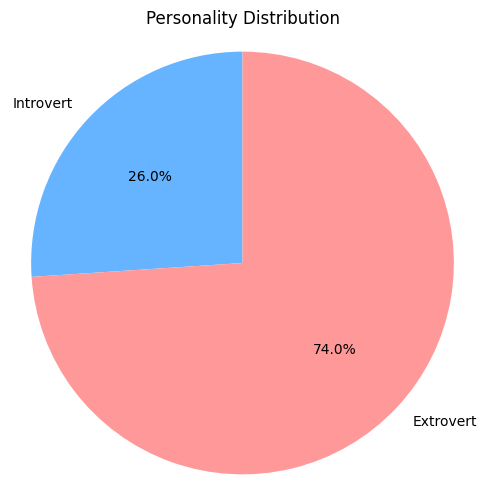

In [6]:
# Calculating value counts for each Personality type
personality_counts = df_train_raw.select(pl.col("Personality")).to_series().value_counts()

# Extracting labels and counts for the pie chart
labels = personality_counts["Personality"].to_list()
sizes = personality_counts["count"].to_list()

# Creating a pie chart to visualize class imbalance
plt.figure(figsize = (6, 6))
plt.pie(sizes, labels = labels, autopct = "%1.1f%%", startangle = 90, colors = ["#66b3ff", "#ff9999"])
plt.title("Personality Distribution")
plt.axis("equal")  # Ensuring the pie chart is a circle
plt.show()

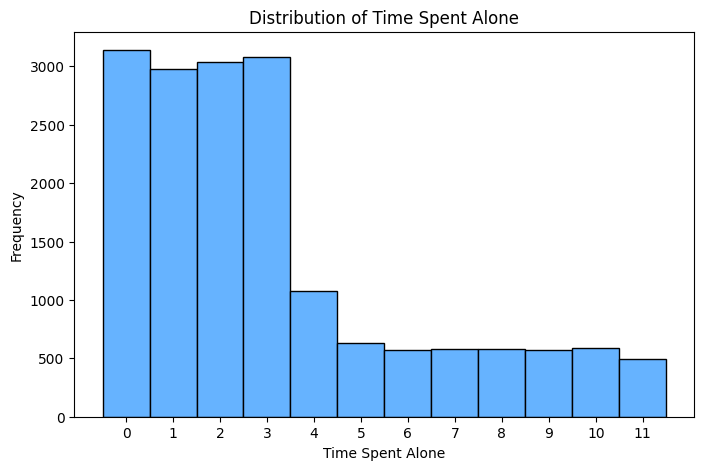

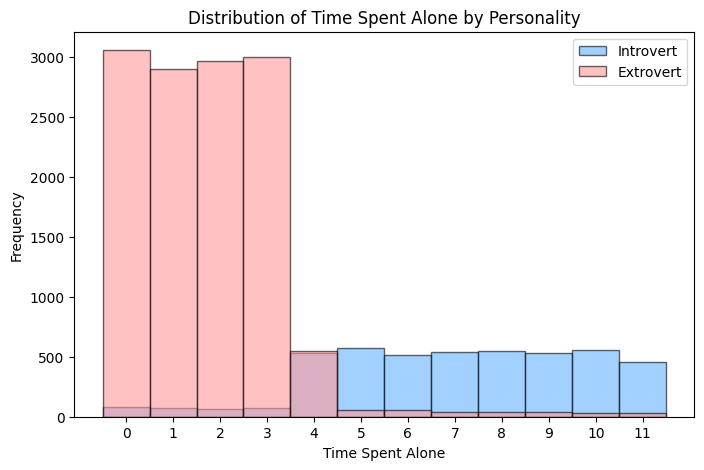

/var/folders/5q/0hckk7812vs4m11jprtzff600000gn/T/ipykernel_17016/2305946291.py:46: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("total_count")


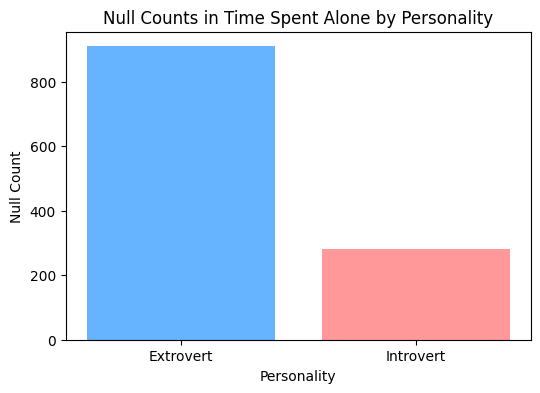

In [7]:
# Filtering out nulls from Time_spent_Alone for the first two visualizations
df_time_spent = df_train_raw.filter(pl.col("Time_spent_Alone").is_not_null())

# Creating a histogram for the general distribution of Time_spent_Alone (range 0-11)
plt.figure(figsize = (8, 5))
plt.hist(
    df_time_spent["Time_spent_Alone"].to_numpy(),
    bins = np.arange(0, 13) - 0.5,  # Adding bins for each integer value from 0 to 11
    color = "#66b3ff",
    edgecolor = "black"
)
plt.title("Distribution of Time Spent Alone")
plt.xlabel("Time Spent Alone")
plt.ylabel("Frequency")
plt.xticks(range(0, 12))
plt.show()

# Creating a histogram for Time_spent_Alone segmented by Personality (range 0-11)
plt.figure(figsize = (8, 5))
for personality, color in zip(labels, ["#66b3ff", "#ff9999"]):
    data = df_time_spent.filter(pl.col("Personality") == personality)["Time_spent_Alone"].to_numpy()
    plt.hist(
        data,
        bins = np.arange(0, 13) - 0.5,
        alpha = 0.6,
        label = personality,
        color = color,
        edgecolor = "black"
    )
plt.title("Distribution of Time Spent Alone by Personality")
plt.xlabel("Time Spent Alone")
plt.ylabel("Frequency")
plt.xticks(range(0, 12))
plt.legend()
plt.show()

# Calculating null counts in Time_spent_Alone segmented by Personality
nulls_by_personality = (
    df_train_raw
    .with_columns([
        pl.col("Time_spent_Alone").is_null().alias("is_null")
    ])
    .group_by("Personality")
    .agg([
        pl.col("is_null").sum().alias("null_count"),
        pl.count().alias("total_count")
    ])
    .with_columns([
        (pl.col("null_count") / pl.col("total_count") * 100).alias("null_percentage")
    ])
    .to_pandas()
)

# Creating a bar plot for null counts segmented by Personality
plt.figure(figsize = (6, 4))
plt.bar(
    nulls_by_personality["Personality"],
    nulls_by_personality["null_count"],
    color = ["#66b3ff", "#ff9999"]
)
plt.title("Null Counts in Time Spent Alone by Personality")
plt.xlabel("Personality")
plt.ylabel("Null Count")
plt.show()

In [8]:
# # Creating a grouped bar plot for Stage_fear by Personality and adding count annotations
# plt.figure(figsize = (7, 4))
# bars_introvert = plt.bar(x - width / 2, counts_introvert, width, label = "Introvert", color = "#66b3ff")
# bars_extrovert = plt.bar(x + width / 2, counts_extrovert, width, label = "Extrovert", color = "#ff9999")

# # Adding count annotations to the top of the bars
# for bar in bars_introvert:
#     plt.text(
#         bar.get_x() + bar.get_width() / 2,
#         bar.get_height(),
#         f"{int(bar.get_height())}",
#         ha = "center",
#         va = "bottom"
#     )
# for bar in bars_extrovert:
#     plt.text(
#         bar.get_x() + bar.get_width() / 2,
#         bar.get_height(),
#         f"{int(bar.get_height())}",
#         ha = "center",
#         va = "bottom"
#     )

# plt.xticks(x, stage_fear_personality_counts["Stage_fear"].unique())
# plt.title("Stage Fear Responses by Personality")
# plt.xlabel("Stage Fear")
# plt.ylabel("Count")
# plt.legend()
# plt.show()


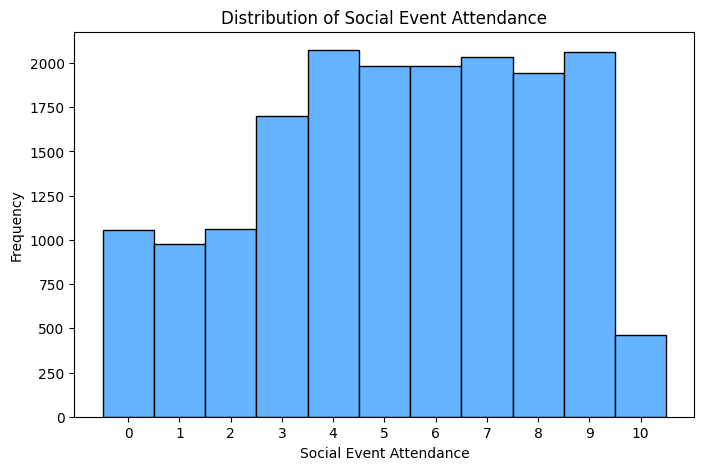

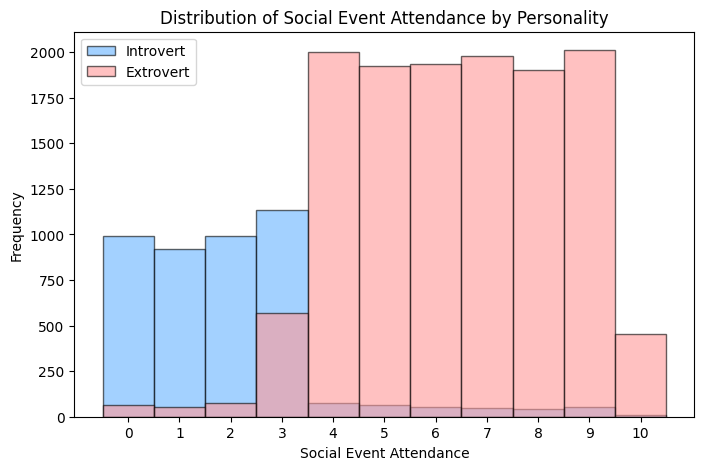

/var/folders/5q/0hckk7812vs4m11jprtzff600000gn/T/ipykernel_17016/2619650500.py:46: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("total_count")


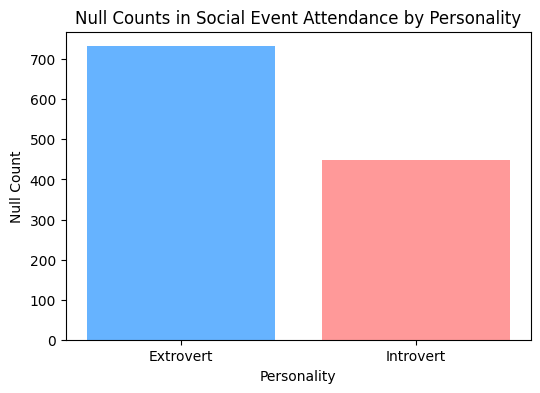

In [9]:
# Filtering out nulls from Social_event_attendance for the first two visualizations
df_social_event = df_train_raw.filter(pl.col("Social_event_attendance").is_not_null())

# Creating a histogram for the general distribution of Social_event_attendance (range 0-10)
plt.figure(figsize = (8, 5))
plt.hist(
    df_social_event["Social_event_attendance"].to_numpy(),
    bins = np.arange(0, 12) - 0.5,  # Adding bins for each integer value from 0 to 11
    color = "#66b3ff",
    edgecolor = "black"
)
plt.title("Distribution of Social Event Attendance")
plt.xlabel("Social Event Attendance")
plt.ylabel("Frequency")
plt.xticks(range(0, 11))
plt.show()

# Creating a histogram for Social_event_attendance segmented by Personality (range 0-10)
plt.figure(figsize = (8, 5))
for personality, color in zip(labels, ["#66b3ff", "#ff9999"]):
    data = df_social_event.filter(pl.col("Personality") == personality)["Social_event_attendance"].to_numpy()
    plt.hist(
        data,
        bins = np.arange(0, 12) - 0.5,
        alpha = 0.6,
        label = personality,
        color = color,
        edgecolor = "black"
    )
plt.title("Distribution of Social Event Attendance by Personality")
plt.xlabel("Social Event Attendance")
plt.ylabel("Frequency")
plt.xticks(range(0, 11))
plt.legend()
plt.show()

# Calculating null counts in Social_event_attendance segmented by Personality
nulls_by_personality_social = (
    df_train_raw
    .with_columns([
        pl.col("Social_event_attendance").is_null().alias("is_null")
    ])
    .group_by("Personality")
    .agg([
        pl.col("is_null").sum().alias("null_count"),
        pl.count().alias("total_count")
    ])
    .with_columns([
        (pl.col("null_count") / pl.col("total_count") * 100).alias("null_percentage")
    ])
    .to_pandas()
)

# Creating a bar plot for null counts segmented by Personality
plt.figure(figsize = (6, 4))
plt.bar(
    nulls_by_personality_social["Personality"],
    nulls_by_personality_social["null_count"],
    color = ["#66b3ff", "#ff9999"]
)
plt.title("Null Counts in Social Event Attendance by Personality")
plt.xlabel("Personality")
plt.ylabel("Null Count")
plt.show()

### Multivariate Analysis

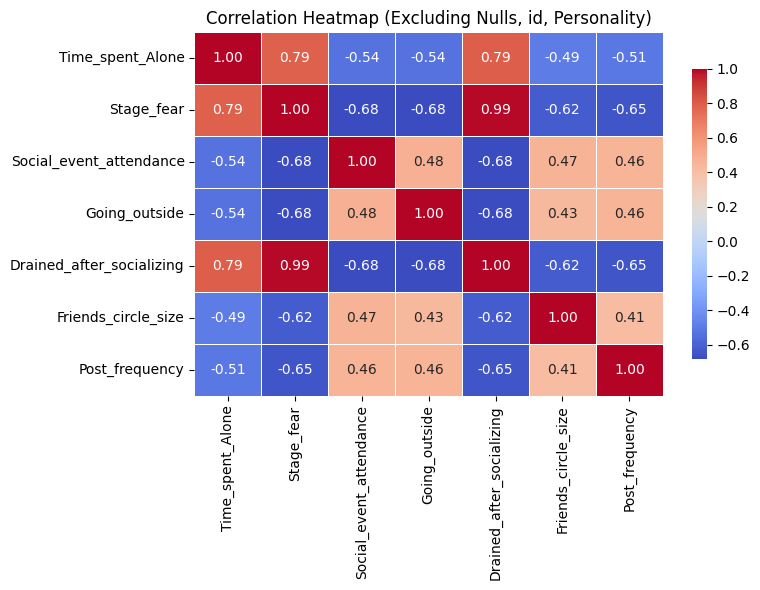

In [10]:
import seaborn as sns

# Creating a copy of the dataframe excluding "id" and "Personality" columns and dropping nulls
df_heatmap = (
    df_train_raw
    .select([col for col in df_train_raw.columns if col not in ["id", "Personality"]])
    .drop_nulls()
)

# Mapping "Yes"/"No" to 1/0 for binary categorical columns
df_heatmap = (
    df_heatmap
    .with_columns([
        (pl.col("Stage_fear") == "Yes").cast(pl.Int8).alias("Stage_fear"),
        (pl.col("Drained_after_socializing") == "Yes").cast(pl.Int8).alias("Drained_after_socializing")
    ])
)

# Calculating the correlation matrix using polars and converting to pandas for seaborn
corr_matrix = df_heatmap.to_pandas().corr()

# Creating a pretty heatmap using seaborn
plt.figure(figsize = (8, 6))
sns.heatmap(
    corr_matrix,
    annot = True,
    fmt = ".2f",
    cmap = "coolwarm",
    linewidths = 0.5,
    cbar_kws = {"shrink": 0.8}
)
plt.title("Correlation Heatmap (Excluding Nulls, id, Personality)")
plt.tight_layout()
plt.show()

In [ ]:
# Selecting numeric and binary-encoded features, dropping rows with nulls
features = [
    "Time_spent_Alone",
    "Stage_fear",
    "Social_event_attendance",
    "Going_outside",
    "Drained_after_socializing",
    "Friends_circle_size",
    "Post_frequency"
]

# Encoding "Yes"/"No" to 1/0 for binary features
df_umap = (
    df_train_raw
        .select([
            pl.col("Time_spent_Alone"),
            pl.col("Stage_fear").replace({"Yes": 1, "No": 0}).cast(pl.Int64),
            pl.col("Social_event_attendance"),
            pl.col("Going_outside"),
            pl.col("Drained_after_socializing").replace({"Yes": 1, "No": 0}).cast(pl.Int64),
            pl.col("Friends_circle_size"),
            pl.col("Post_frequency"),
            pl.col("Personality")
        ])
        .drop_nulls()
        .to_pandas()
)

X = df_umap[features].values
y = df_umap["Personality"].values

# Creating UMAP embedding
umap_embedder = umap.UMAP(random_state = 42)
X_umap = umap_embedder.fit_transform(X)

# Creating t-SNE embedding
tsne_embedder = TSNE(n_components = 2, random_state = 42, perplexity = 30)
X_tsne = tsne_embedder.fit_transform(X)

# Plotting UMAP
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
for label, color in zip(["Extrovert", "Introvert"], ["royalblue", "orange"]):
    idx = y == label
    ax[0].scatter(X_umap[idx, 0], X_umap[idx, 1], label = label, alpha = 0.5, s = 15, color = color)
ax[0].set_title("UMAP Projection", fontsize = 14, weight = "bold")
ax[0].set_xlabel("UMAP 1")
ax[0].set_ylabel("UMAP 2")
ax[0].legend()

# Plotting t-SNE
for label, color in zip(["Extrovert", "Introvert"], ["royalblue", "orange"]):
    idx = y == label
    ax[1].scatter(X_tsne[idx, 0], X_tsne[idx, 1], label = label, alpha = 0.5, s = 15, color = color)
ax[1].set_title("t-SNE Projection", fontsize = 14, weight = "bold")
ax[1].set_xlabel("t-SNE 1")
ax[1].set_ylabel("t-SNE 2")
ax[1].legend()

plt.tight_layout()
plt.show()

AttributeError: module 'umap' has no attribute 'UMAP'